In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def plot_cost_function(method_names, cost_lists):
    data = []
    for method, costs in zip(method_names, cost_lists):
        for iteration, cost in enumerate(costs, start=1):
            data.append([method, iteration, cost])

    df = pd.DataFrame(data, columns=["Method", "Iteration", "Cost"])
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="darkgrid")
    minData = np.inf
    for method in method_names:
        marker = "o" if "BFGS" in method else "X"
        subset = df[df["Method"] == method]
        sns.lineplot(
            x="Iteration",
            y="Cost",
            data=subset,
            marker=marker,
            label=method,
            markersize=8,
            color="tab:blue" if "RS" in method else "tab:orange",
        )
        minData = min(minData, subset["Cost"].min())

    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Stress", fontsize=12)
    plt.ylim(minData - 50, minData + 1000)
    plt.title("Cost Function per Iteration", fontsize=14)
    plt.legend(title="Method", fontsize=10)
    plt.tight_layout()
    plt.show()

In [94]:
def parse_hist_file(file_path):
    data = {}
    with open(file_path, "r") as file:
        num_matrices, num_methods = map(int, file.readline().strip().split())

        for _ in range(num_matrices):
            matrix_name = file.readline().strip()
            data[matrix_name] = {}

            for _ in range(num_methods):
                method_name = file.readline().strip()
                data[matrix_name][method_name] = {}
                _hist_size = int(file.readline().strip())
                hist = list(map(float, file.readline().strip().split()))
                data[matrix_name][method_name]["history"] = hist
                time_line = file.readline().strip()
                avg_time = float(time_line.split(": ")[1])
                data[matrix_name][method_name]["average_elapsed_time"] = avg_time
                score_line = file.readline().strip()
                avg_score = float(score_line.split(": ")[1])
                data[matrix_name][method_name]["average_score"] = avg_score
                variance_line = file.readline().strip()
                variance = float(variance_line.split(": ")[1])
                data[matrix_name][method_name]["variance_score"] = variance

    return data

In [95]:
file_path = "../../out/_hist.txt"
parsed_data = parse_hist_file(file_path)
print(parsed_data)

{'jagmesh1': {'FR': {'history': [6560.282155, 3292.358744, 1684.76652, 1069.68677, 879.510699, 777.300312, 703.392137, 645.098422, 599.416638, 562.804563, 536.706952, 513.337742, 495.146197, 476.739106, 463.736858, 448.020342, 436.683114, 421.207253, 412.106526, 397.794265, 389.884758, 377.472994, 370.40669, 360.166408, 354.124716, 344.959095, 339.813436, 332.378993, 327.24939, 319.062618, 315.361896, 307.732548, 303.876192, 296.507829, 292.349569, 284.751553, 281.06525, 274.095553, 270.183378, 263.999512, 260.497568, 254.206872, 250.826596, 244.327784, 240.84169, 235.050611, 231.291358, 225.980322, 222.205737, 217.038011, 213.464669, 208.852064, 204.721801, 200.206021, 196.826646, 192.913444, 189.865737, 186.288927, 182.991862, 179.506562, 176.728405, 173.14715, 170.214263, 166.583657, 163.611699, 160.104985, 156.92455, 153.392544, 150.127434, 146.426169, 143.117085, 139.668029, 136.301494], 'average_elapsed_time': 1.224409, 'average_score': 136.301494, 'variance_score': 0.0}, 'RS_FR'

In [96]:
print(parsed_data.keys())
print(parsed_data["jagmesh1"]["L_BFGS"]["average_elapsed_time"])
print(parsed_data["jagmesh1"]["L_BFGS"]["average_score"])
print(parsed_data["jagmesh1"]["L_BFGS"]["variance_score"])

dict_keys(['jagmesh1', 'jagmesh2', 'jagmesh3', 'dwt_221', 'dwt_1005', 'arc130', 'ash85', 'ash292', 'bcspwr08', 'bp_800', 'can_715'])
1.235356
-309.317016
0.0


jagmesh1


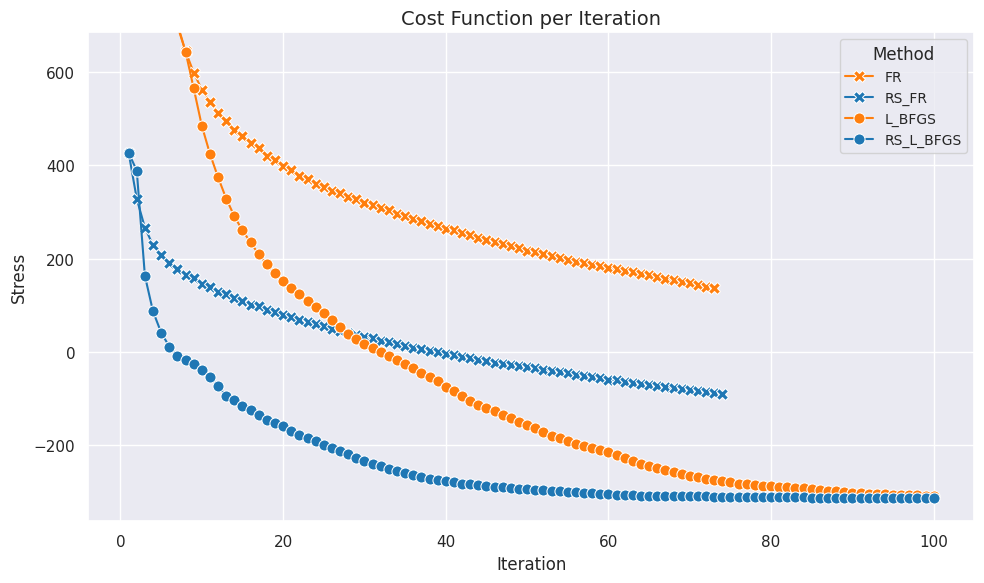

jagmesh2


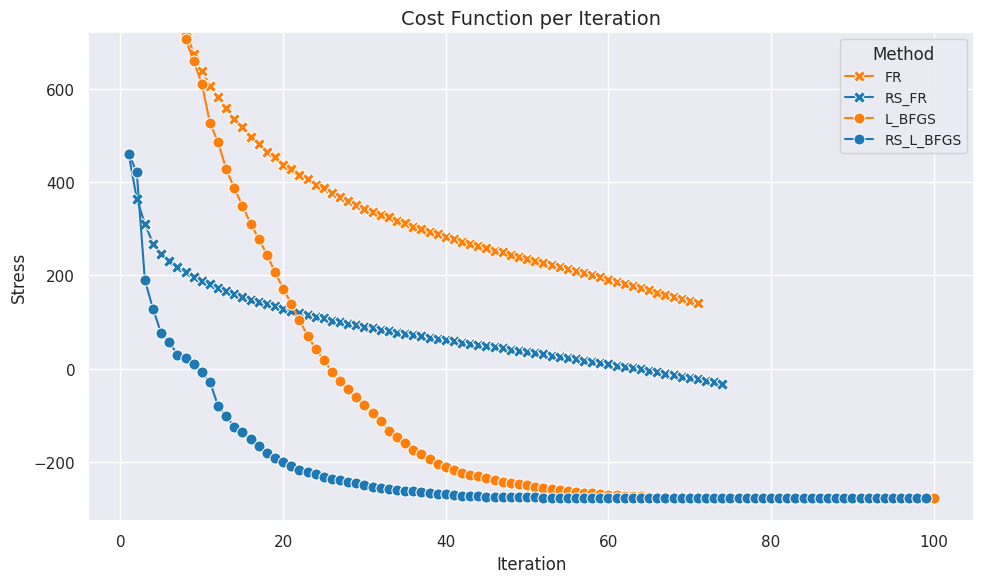

jagmesh3


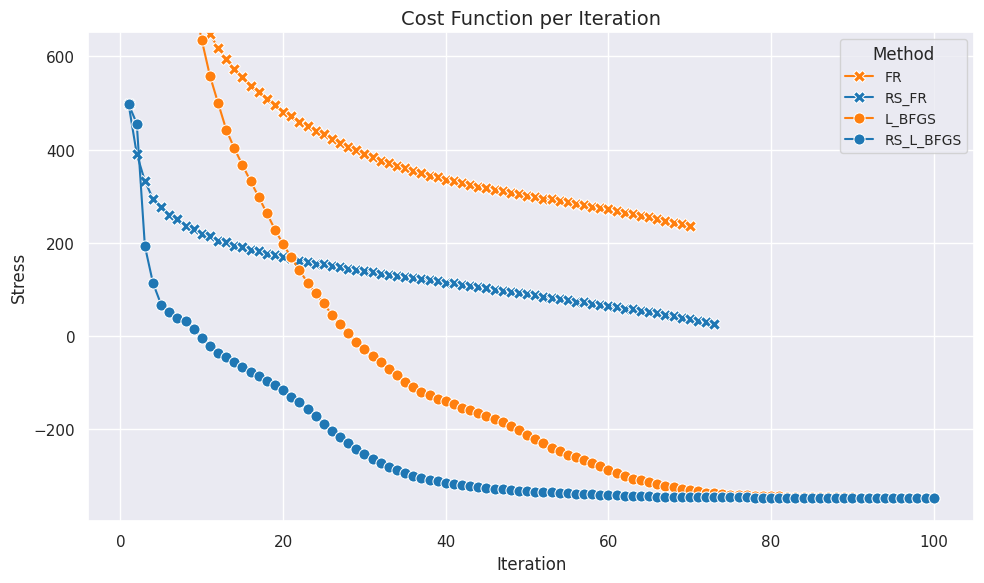

dwt_221


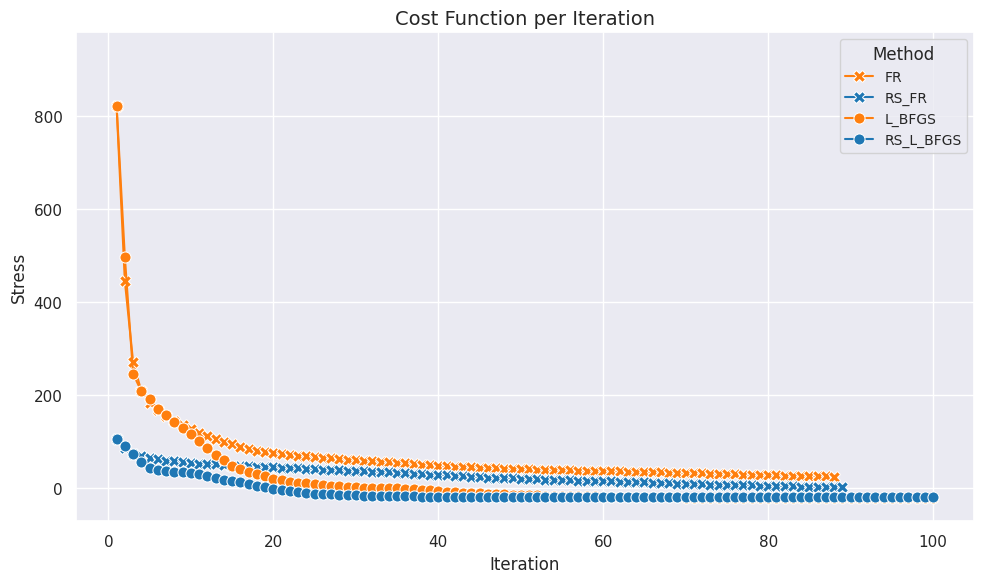

dwt_1005


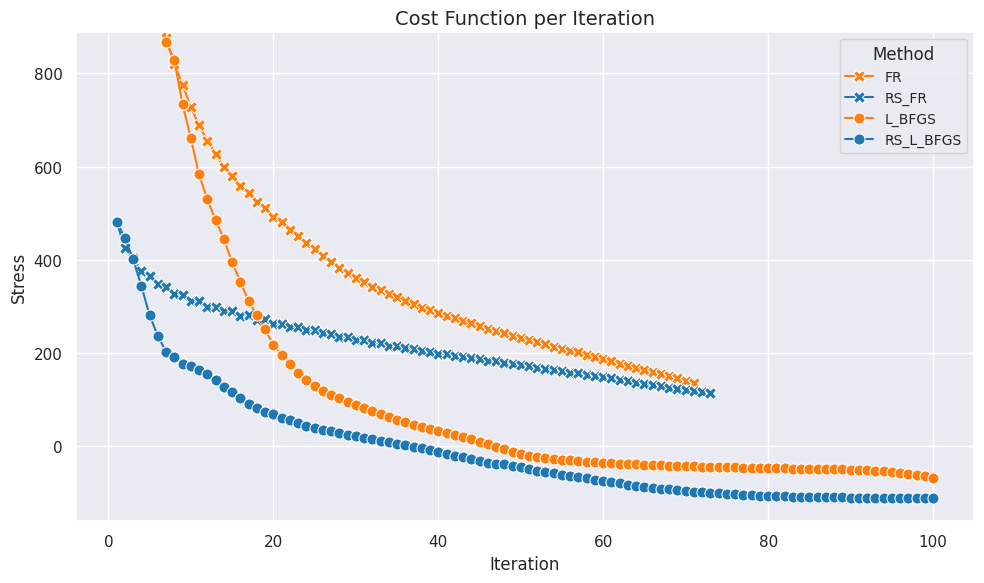

arc130


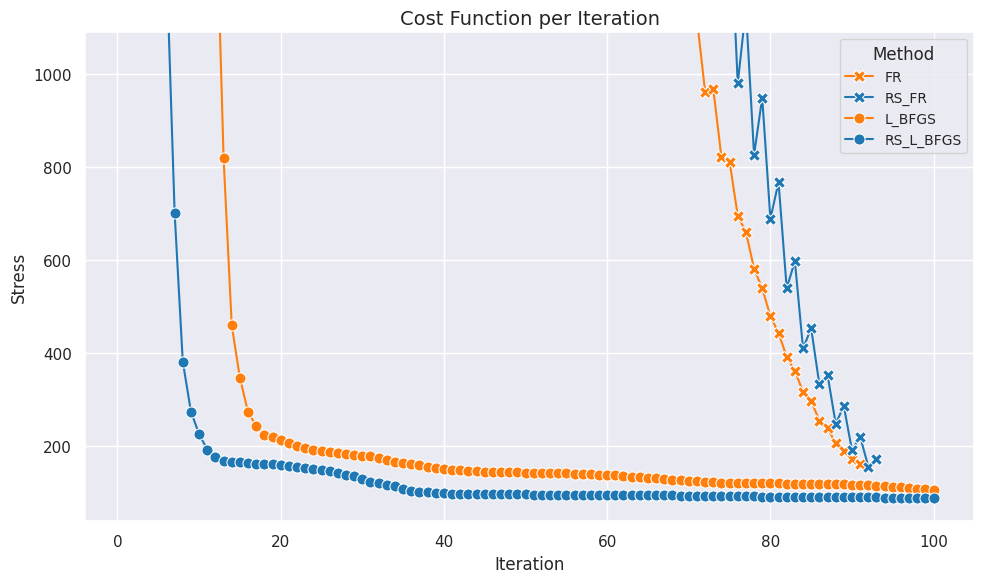

ash85


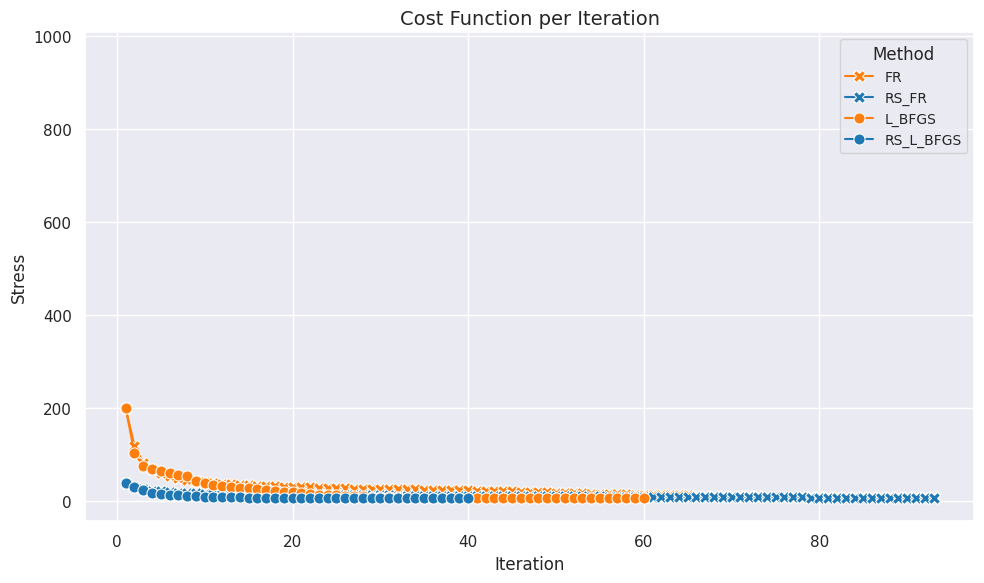

ash292


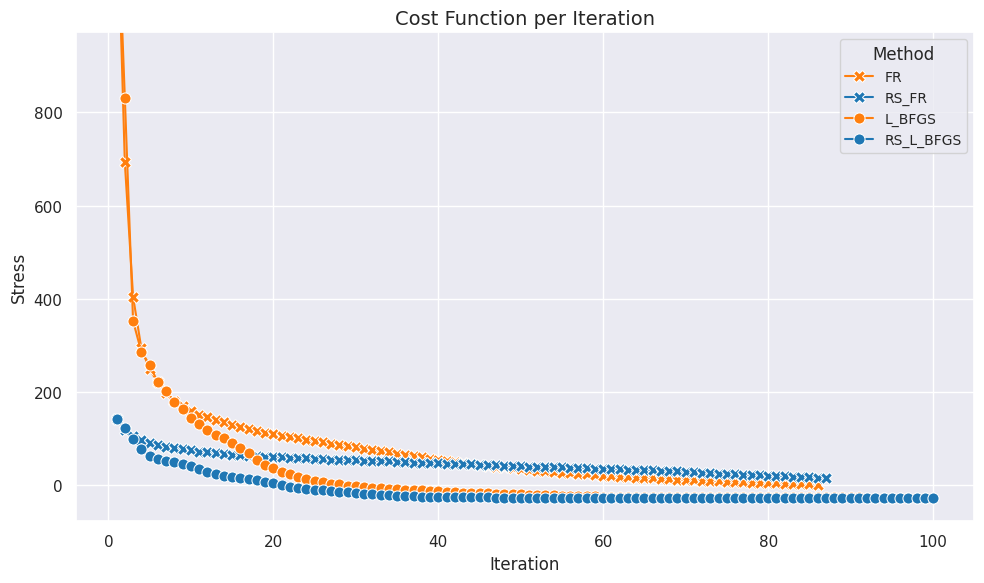

bcspwr08


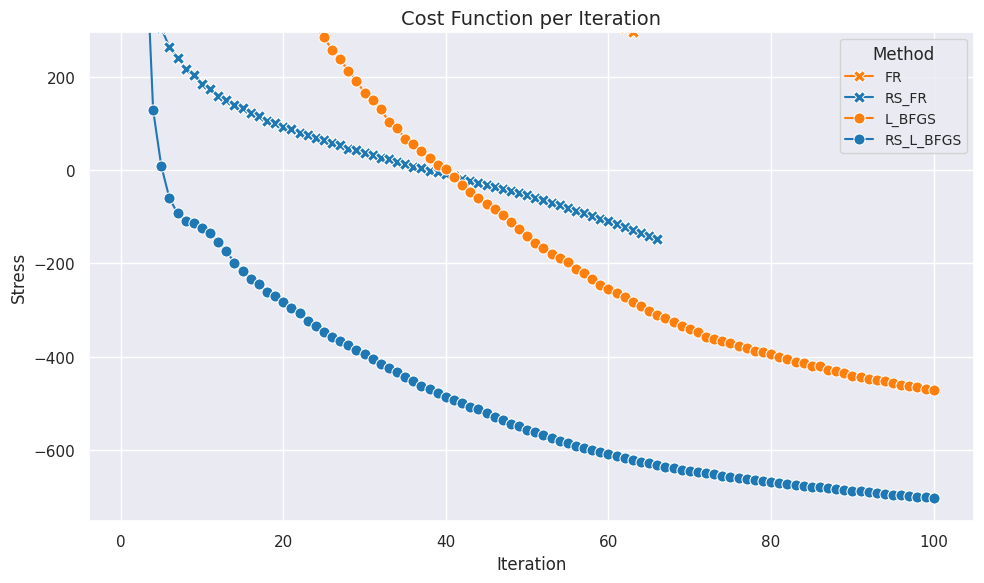

bp_800


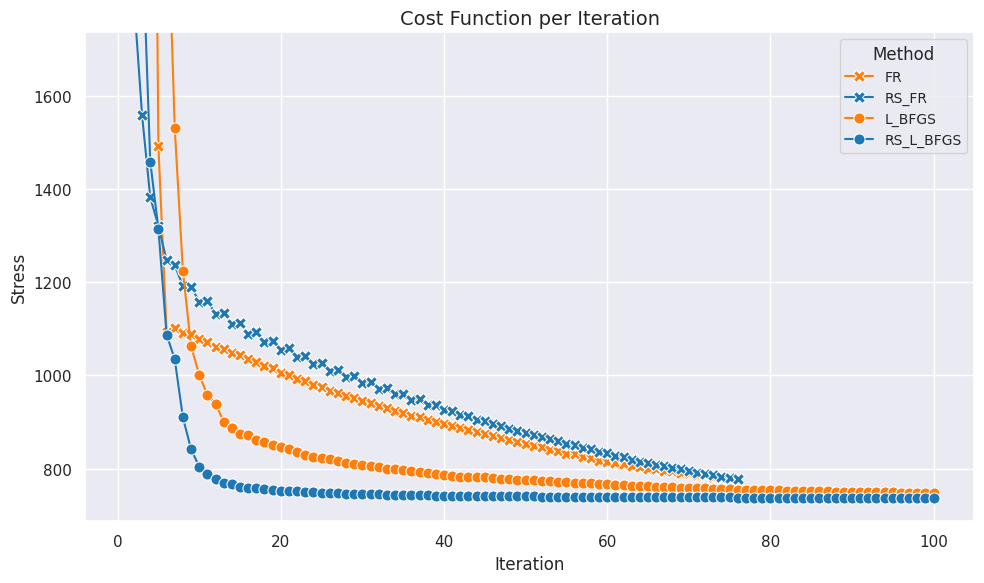

can_715


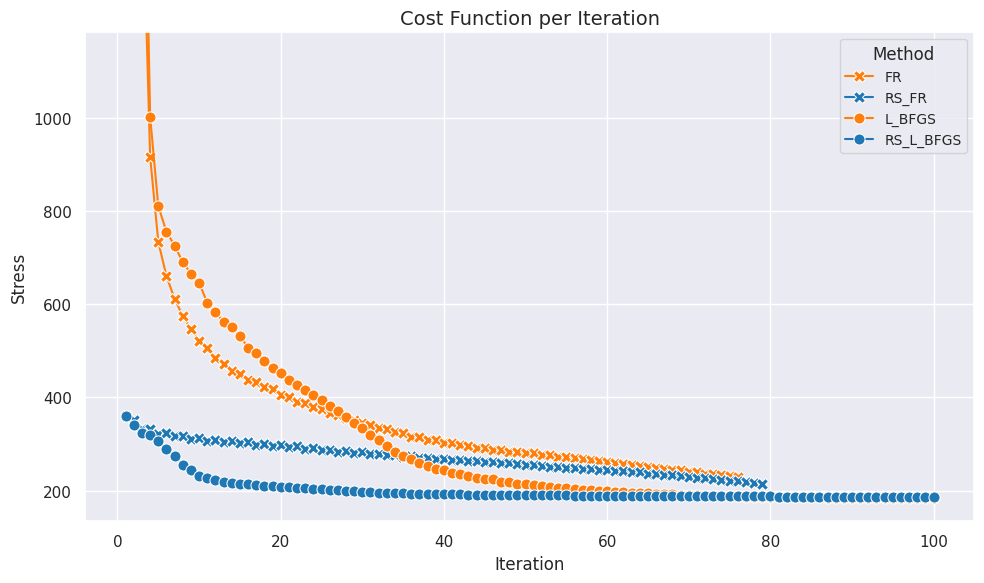

In [97]:
for matrixName in parsed_data:
    print(matrixName)
    methods = parsed_data[matrixName].keys()
    costs = [parsed_data[matrixName][method]["history"] for method in methods]
    plot_cost_function(methods, costs)